In [1]:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
from keras.callbacks import EarlyStopping

In [6]:
train_data=pd.read_csv('train_data.csv')
test_data=pd.read_csv('test_data.csv')
train_y=pd.read_csv('train_y.csv')
y_test=pd.read_csv('test_y.csv')


In [7]:
scaler = StandardScaler()
nn_dataset = scaler.fit_transform(train_data)
X_train, X_valid, y_train, y_valid = train_test_split(nn_dataset, train_y,random_state=42)
nn_testset = scaler.fit_transform(test_data)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2200      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2301 (8.99 KB)
Trainable params: 2301 (8.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


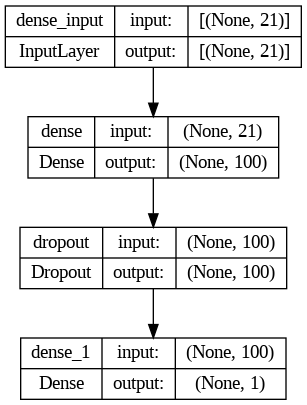

In [8]:
# definisco il model
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()
keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [9]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

early_stopping_cb = EarlyStopping(monitor="val_loss", patience=4,
                                  start_from_epoch=4,
                                  restore_best_weights=True, verbose=1)

In [10]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                  callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
2711/2711 [==============================] - 15s 4ms/step - loss: 0.4671 - accuracy: 0.7999 - val_loss: 0.4307 - val_accuracy: 0.8346
Epoch 2/100
  52/2711 [..............................] - ETA: 7s - loss: 0.4447 - accuracy: 0.8245

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2711/2711 [==============================] - 11s 4ms/step - loss: 0.4199 - accuracy: 0.8442 - val_loss: 0.3962 - val_accuracy: 0.8600
Epoch 3/100
2711/2711 [==============================] - 11s 4ms/step - loss: 0.3977 - accuracy: 0.8567 - val_loss: 0.3851 - val_accuracy: 0.8632
Epoch 4/100
2711/2711 [==============================] - 9s 3ms/step - loss: 0.3910 - accuracy: 0.8595 - val_loss: 0.3823 - val_accuracy: 0.8664
Epoch 5/100
2711/2711 [==============================] - 10s 4ms/step - loss: 0.3865 - accuracy: 0.8609 - val_loss: 0.3748 - val_accuracy: 0.8669
Epoch 6/100
2711/2711 [==============================] - 11s 4ms/step - loss: 0.3820 - accuracy: 0.8619 - val_loss: 0.3701 - val_accuracy: 0.8662
Epoch 7/100
2711/2711 [==============================] - 11s 4ms/step - loss: 0.3801 - accuracy: 0.8622 - val_loss: 0.3651 - val_accuracy: 0.8665
Epoch 8/100
2711/2711 [==============================] - 10s 4ms/step - loss: 0.3773 - accuracy: 0.8628 - val_loss: 0.3674 - val_accuracy

In [11]:
model.evaluate(nn_testset,y_test)

904/904 [==============================] - 2s 2ms/step - loss: 0.3507 - accuracy: 0.8693


[0.35072091221809387, 0.8692765235900879]

In [12]:
nn_result = []
for i in range(10,100,10):
    # model senza dropout
    model = keras.models.Sequential([
        keras.layers.Dense(i, activation="relu",input_shape=X_train.shape[1:]),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer="adam", loss="binary_crossentropy",
                  metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
    result = model.evaluate(nn_dataset, train_y)
    nn_result.append([i,result[0], result[1]])
    print(f"NN con {i} neuroni in un livello nascosto: {result}")

NN_result = pd.DataFrame(data=nn_result, columns=['numero neuroni', 'loss', 'accuracy'])

Epoch 1/100
2711/2711 [==============================] - 15s 4ms/step - loss: 0.5141 - accuracy: 0.7676 - val_loss: 0.4753 - val_accuracy: 0.7845
Epoch 2/100
2711/2711 [==============================] - 11s 4ms/step - loss: 0.4702 - accuracy: 0.7930 - val_loss: 0.4526 - val_accuracy: 0.8047
Epoch 3/100
2711/2711 [==============================] - 12s 4ms/step - loss: 0.4601 - accuracy: 0.8090 - val_loss: 0.4449 - val_accuracy: 0.8187
Epoch 4/100
2711/2711 [==============================] - 11s 4ms/step - loss: 0.4577 - accuracy: 0.8139 - val_loss: 0.4417 - val_accuracy: 0.8210
Epoch 5/100
2711/2711 [==============================] - 10s 4ms/step - loss: 0.4543 - accuracy: 0.8172 - val_loss: 0.4348 - val_accuracy: 0.8279
Epoch 6/100
2711/2711 [==============================] - 11s 4ms/step - loss: 0.4461 - accuracy: 0.8229 - val_loss: 0.4217 - val_accuracy: 0.8403
Epoch 7/100
2711/2711 [==============================] - 11s 4ms/step - loss: 0.4384 - accuracy: 0.8294 - val_loss: 0.4130 -

Variazione accuracy e loss al variare del numero di nodi

In [13]:
import seaborn as sns
num_nodi = [10, 20, 30, 40, 50, 60, 70 ,80 ,90]
accuracy = [0.8577,0.8676,0.8689,0.8706,0.8697,0.8705,0.8714,0.8719,0.8718]
loss= [0.399,0.376,0.372,0.362,0.360,0.361,0.355,0.349,0.348]



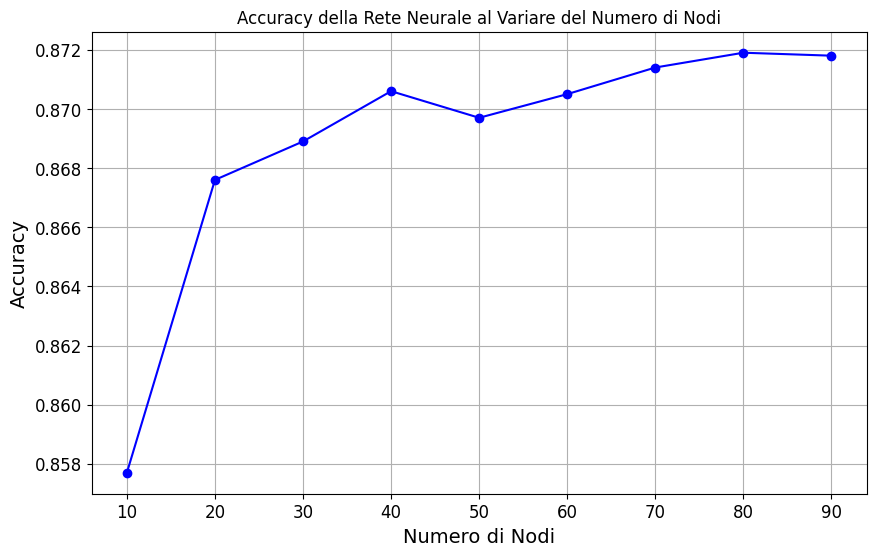

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(num_nodi, accuracy, marker='o', linestyle='-', color='b')
plt.title('Accuracy della Rete Neurale al Variare del Numero di Nodi')
plt.xlabel('Numero di Nodi')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(num_nodi)
plt.show()

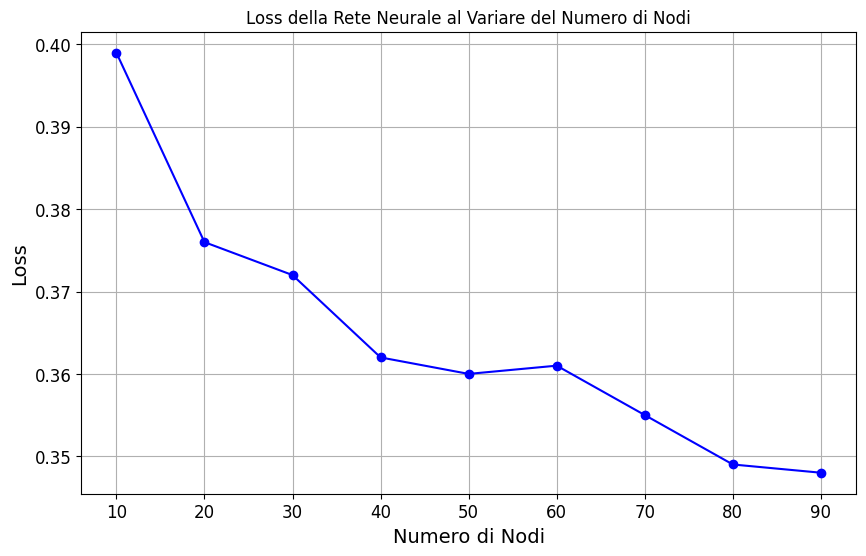

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(num_nodi, loss, marker='o', linestyle='-', color='b')
plt.title('Loss della Rete Neurale al Variare del Numero di Nodi')
plt.xlabel('Numero di Nodi')
plt.ylabel('Loss')
plt.grid(True)
plt.xticks(num_nodi)
plt.show()

In [ ]:
# plot training history
print("loss")
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.legend()
plt.show()
print("Accuracy")
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()
plt.show()

model.evaluate(nn_dataset, train_y)

loss


NameError: ignored